In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
salary_dataset = pd.read_csv("Your csv file destination",low_memory=False)
print(salary_dataset.head())

   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830


In [31]:
input_features = ['age','experience']
output_features = ['income']
X = salary_dataset[input_features]
Y = salary_dataset[output_features]

In [32]:
X = X.to_numpy()
Y = Y.to_numpy()
print(X)
print(Y)

[[25  1]
 [30  3]
 [47  2]
 [32  5]
 [43 10]
 [51  7]
 [28  5]
 [33  4]
 [37  5]
 [39  8]
 [29  1]
 [47  9]
 [54  5]
 [51  4]
 [44 12]
 [41  6]
 [58 17]
 [23  1]
 [44  9]
 [37 10]]
[[30450]
 [35670]
 [31580]
 [40130]
 [47830]
 [41630]
 [41340]
 [37650]
 [40250]
 [45150]
 [27840]
 [46110]
 [36720]
 [34800]
 [51300]
 [38900]
 [63600]
 [30870]
 [44190]
 [48700]]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
y_train = scaler_Y.fit_transform(y_train) 
y_test = scaler_Y.transform(y_test)

In [34]:
m, n = X_train.shape
w = np.random.randn(n, 1) * 0.01
b = 0

In [35]:
def compute_gradient(X,y,w,b):
    dj_dw  = np.zeros((n,1))
    dj_db = 0
    no_of_observations, no_of_features = X.shape
    for i in range(no_of_observations):
        # err = (np.dot(X[i],w)- y[i])
        err = (np.dot(X[i], w) + b - y[i])
        for j in range(no_of_features):
            dj_dw[j] = dj_dw[j] + err * X[i][j]
        dj_db = dj_db + err
    dj_dw = dj_dw / no_of_observations
    dj_db = dj_db / no_of_observations
    return dj_dw,dj_db

In [36]:
iterations = 5000  
learning_rate = 0.01 

for i in range(iterations):
    change_in_w, change_in_b = compute_gradient(X_train, y_train, w, b)
    w -= learning_rate * change_in_w
    b -= learning_rate * change_in_b
    if i % 500 == 0:
        loss = mean_squared_error(y_train, np.dot(X_train, w) + b)
        print(f"Iteration {i}, Loss: {loss}")

y_pred_scaled = np.dot(X_test, w) + b  
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_test_original = scaler_Y.inverse_transform(y_test)

Iteration 0, Loss: 0.9423250434653119
Iteration 500, Loss: 0.02754741692404341
Iteration 1000, Loss: 0.025886428870389253
Iteration 1500, Loss: 0.025878648997408167
Iteration 2000, Loss: 0.025878612552613523
Iteration 2500, Loss: 0.02587861238188797
Iteration 3000, Loss: 0.025878612381088215
Iteration 3500, Loss: 0.02587861238108446
Iteration 4000, Loss: 0.02587861238108444
Iteration 4500, Loss: 0.025878612381084444


In [37]:
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)
print("Final MSE of our model:", mse)
print("Final R² Score of our model:", r2)

Final MSE of our model: 753796.7693730458
Final R² Score of our model: 0.9387098237078219


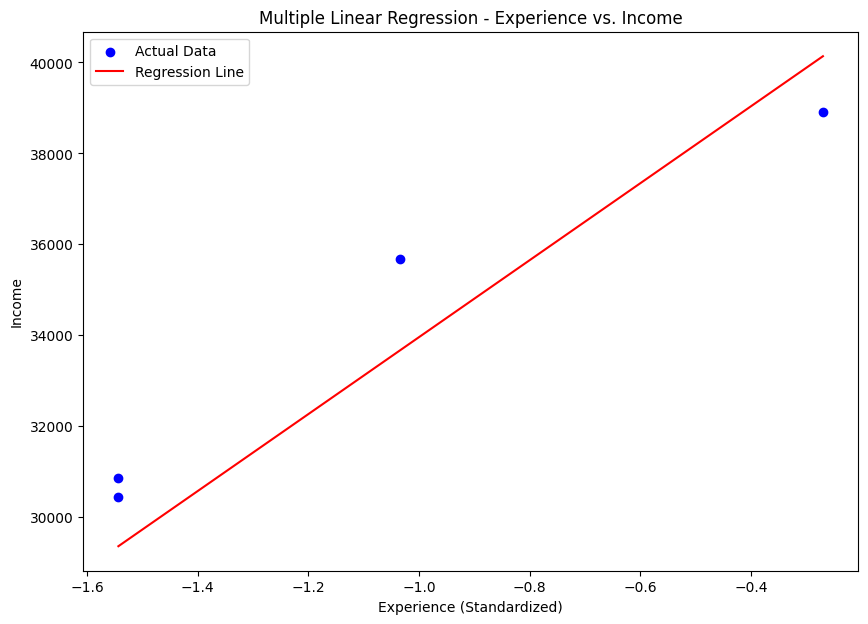

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))

# Scatter plot for actual data
plt.scatter(X_test[:, 1], y_test_original, color='blue', label='Actual Data')

# Line plot for predicted values
x_line = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
y_line = w[1] * x_line + b  # Using only the coefficient for experience
y_line = scaler_Y.inverse_transform(y_line.reshape(-1, 1)).flatten()  # Inverse transform

plt.plot(x_line, y_line, color='red', label='Regression Line')

plt.xlabel("Experience (Standardized)")
plt.ylabel("Income")
plt.title("Multiple Linear Regression - Experience vs. Income")
plt.legend()
plt.show()


In [23]:
# now lets try using predefined Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_predefined = model.predict(X_test)
mse_predefined_method = mean_squared_error(y_test, y_pred_predefined)
r2_predefined_method = r2_score(y_test, y_pred_predefined)
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MSE: 753796.7693730462
R² Score: 0.9387098237078219
